The UN recognizes Kosovo's independance. To reflect their understanding of independent nations, we must add in a seperate country for Kosovo. 

This file attempts to update the geocoded files to ensure they are accuratly reflecting their country boundaries 

In [1]:
import pandas as pd 
import geopandas as gpd
import numpy as np
pd.set_option('display.max_columns', 500)

# to specify geometry / location data 
import shapely.wkt
import json

# to visualize 
import matplotlib.pyplot as plt

# Update the Country Geocode Dataset 

__Load in the country dataset__ 

In [2]:
# add in localities to the spreadsheet 
countries = pd.read_csv("../../data_final/countries.csv")

# convert geometries to shapes 
countries['geometry'] = [shapely.wkt.loads(x) for x in countries['geometry']]
countries = gpd.GeoDataFrame(countries).reset_index(drop=True)
countries.head()

,name,country_id,country,geometry,iso,shape_length,shape_area
0,American Samoa,1,American Samoa,"MULTIPOLYGON (((-170.74390 -14.37555, -170.749...",AS,0.600124,0.013720
1,United States Minor Outlying Islands,2,United States Minor Outlying Islands,"MULTIPOLYGON (((-160.02114 -0.39805, -160.0281...",UM,0.480216,0.003216
2,Cook Islands,3,Cook Islands,"MULTIPOLYGON (((-159.74698 -21.25667, -159.793...",CK,0.980664,0.013073
3,French Polynesia,4,French Polynesia,"MULTIPOLYGON (((-149.17920 -17.87084, -149.258...",PF,3.930211,0.175332
4,Niue,5,Niue,"MULTIPOLYGON (((-169.89389 -19.14556, -169.930...",NU,0.541413,0.021414


__Load in the new Kosovo boundary__ 

Source: Hijmans, Robert J., University of California, Berkeley. Museum of Vertebrate Zoology. National Boundary, Kosovo, 2015 [map]. No Scale Provided. Retrieved April 02, 2022, from https://geodata.lib.utexas.edu/catalog/stanford-pt278dg2451

In [3]:
kosovo = gpd.read_file("/Users/natalie_kraft/Downloads/stanford-pt278dg2451-geojson.json")

In [4]:
# add in kosovo to country data file 

countries = countries.append({'name':'Kosovo', 'country_id':250, 'country':'Kosovo', 'geometry':kosovo['geometry'][0], 'iso':'XK',  'shape_length':6.970461, 'shape_area':1.197174}, ignore_index=True)

__Check to see if Serbia needs to be updated__ --> Serbia included Kosovo. And needs to be updated. 

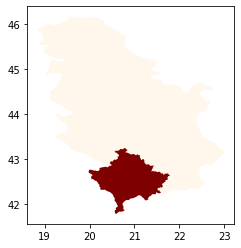

In [5]:
countries.loc[(countries['name'] == 'Serbia') | (countries['name'] == 'Kosovo')].plot(cmap='OrRd')

__Load in the new Serbia boundary__ 
*Note, the intersection of these areas is not taken as it leads extraneous peices surrounding the southern coast of Kosovo that 'belong' to Seria*

Source: Hijmans, Robert J., University of California, Berkeley. Museum of Vertebrate Zoology. National Boundary, Serbia, 2015 [map]. No Scale Provided. Retrieved April 02, 2022, from https://geodata.lib.utexas.edu/catalog/stanford-nw199gc0423

In [6]:
serbia = gpd.read_file("/Users/natalie_kraft/Downloads/stanford-nw199gc0423-geojson.json")

In [7]:
s_dict = {'name':'Serbia', 'country_id':countries[countries['name']=='Serbia']['country_id'].values[0], 'country':'Serbia', 'geometry':serbia['geometry'][0], 'iso':countries[countries['name']=='Serbia']['iso'].values[0],  'shape_length':serbia['geometry'].length[0], 'shape_area':serbia['geometry'].area[0]}

countries = countries[countries['name'] != 'Serbia']
countries = countries.append(s_dict, ignore_index=True).sort_values(by='country_id')

<ipython-input-7-f77bccc1701e>:1: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  s_dict = {'name':'Serbia', 'country_id':countries[countries['name']=='Serbia']['country_id'].values[0], 'country':'Serbia', 'geometry':serbia['geometry'][0], 'iso':countries[countries['name']=='Serbia']['iso'].values[0],  'shape_length':serbia['geometry'].length[0], 'shape_area':serbia['geometry'].area[0]}
<ipython-input-7-f77bccc1701e>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  s_dict = {'name':'Serbia', 'country_id':countries[countries['name']=='Serbia']['country_id'].values[0], 'country':'Serbia', 'geometry':serbia['geometry'][0], 'iso':countries[countries['name']=='Serbia']['iso'].values[0],  'shape_length':serbia['geometry'].

# Update GeoCoding references in Regions and Cities to reference Kosovo

__regions__

In [8]:
# add in regions to the spreadsheet 
regions = pd.read_csv("../../data_final/regions.csv")

# check to see if there is any reference of Serbia 
in_serbia = regions[regions['country'] == 'Serbia']
if len(in_serbia) > 0: 
    print("there are " + str(len(in_serbia)) + " references to Serbia")

there are 2 references to Serbia


In [9]:
# update all regional references to Serbia 
# convert to a shape 

# convert geometries to shapes 
in_serbia['geometry'] = [shapely.wkt.loads(x) for x in in_serbia['geometry']]
in_serbia = gpd.GeoDataFrame(in_serbia).reset_index(drop=True)

# check to see if they are contained with Serbia 
s = countries.loc[countries['name'] == 'Serbia']['geometry'].reset_index()
k = countries.loc[countries['name'] == 'Kosovo']['geometry'].reset_index()
for i in range(0, len(in_serbia)): 
    if s.overlaps(in_serbia['geometry'][i])[0] != True: 
        print("a reference for kosovo may be found")
        if k.overlaps(in_serbia['geometry'][i][0] == True): 
            print("kosovo area found")
            
# no references were found for kosovo, no updating needs to occur

<ipython-input-9-eae224f148e9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_serbia['geometry'] = [shapely.wkt.loads(x) for x in in_serbia['geometry']]


__cities__

In [10]:
# add in regions to the spreadsheet 
cities = pd.read_csv("../../data_final/cities.csv")

# check to see if there is any reference of Serbia 
in_serbia_c = cities[cities['country'] == 'Serbia']
if len(in_serbia_c) > 0: 
    print("there are " + str(len(in_serbia_c)) + " references to Serbia")

there are 225 references to Serbia


In [11]:
# update all regional references to Serbia 
# convert to a shape 

# convert geometries to shapes 
in_serbia_c = gpd.GeoDataFrame(in_serbia_c, geometry=gpd.points_from_xy(in_serbia_c['longitude'], in_serbia_c['latitude']))

in_serbia_c['contained_k'] = [k.contains(x)[0] for x in in_serbia_c['geometry']]
in_serbia_c['contained_s'] = [s.contains(x)[0] for x in in_serbia_c['geometry']]

print("there are " + str(in_serbia_c['contained_s'].sum()) + " points remaining in Serbia")
print("there are " + str(in_serbia_c['contained_k'].sum()) + " points to transfer to Kosovo")

there are 176 points remaining in Serbia
there are 49 points to transfer to Kosovo


In [12]:
new_id = list(range(1, len(in_serbia_c[in_serbia_c['contained_k'] == True]) + 1))
indexes = in_serbia_c[in_serbia_c['contained_k'] == True].index
for i in range(0, len(new_id) - 1): 
    cities.at[indexes[i], 'id'] = new_id[i]
    cities.at[indexes[i], 'country'] = "Kosovo"
    cities.at[indexes[i], 'country_id'] = 250
    in_serbia_c.at[indexes[i], 'replace_id'] = new_id[i]

In [13]:
in_serbia_c['id'] = [str(x) for x in in_serbia_c['id']]

__financial expenditures__ 

Note: at the time of this update, the financial expenditures data is the only preprocessed geocoded set. All other geocoding using this scheme will occur in its associated preprocessing file

In [14]:
# add in regions to the spreadsheet 
data = pd.read_csv("../../data_final/AidData_v2.0.csv" )

# remove decimal references in data 
data['country_id'] = [str(x).split(".")[0] if '.' in str(x) else x for x in data['country_id']]
data['gl3_id'] = [str(x).split(".")[0] if '.' in str(x) else x for x in data['gl3_id']]

# check to see if there is any reference of Serbia 
data_s = data[data['Recipient'] == 'Serbia']

if len(data_s) > 0: 
    print("there are " + str(len(data_s)) + " references to Serbia")

there are 74 references to Serbia


In [15]:
in_serbia_expenditures = in_serbia_c.merge(data_s, right_on='gl3_id', left_on='id', how='right')
print("It appears as though there is no instancs of BRI expenditure logged in Kosovo.")

It appears as though there is no instancs of BRI expenditure logged in Kosovo.


 __visual confirmation of overlap__

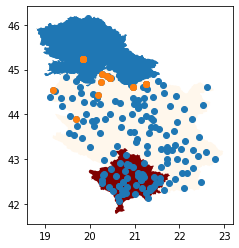

In [16]:
# This is visual confirmation

fig, ax = plt.subplots()

countries.loc[(countries['name'] == 'Serbia') | (countries['name'] == 'Kosovo')].plot(cmap='OrRd', ax=ax)
in_serbia.plot(ax=ax)
in_serbia_c.plot(ax=ax)
in_serbia_expenditures.plot(ax=ax)

## Export updated DataFrames 

In [17]:
# WARNING, YOU ARE ABOUT TO EDIT A BASE DATASET. 
# BE AWARE OF THE CONSEQUENCES, THIS SHOULD BE DONE INFREQUENTLY AND REQUIRES SUPPORT IN THE OTHER GEODATAFRAME
countries.to_csv("../../data_final/countries.csv", index=False)

# WARNING, YOU ARE ABOUT TO EDIT A BASE DATASET. 
# BE AWARE OF THE CONSEQUENCES, THIS SHOULD BE DONE INFREQUENTLY AND REQUIRES SUPPORT IN THE OTHER GEODATAFRAME
cities.to_csv("../../data_final/cities.csv", index=False)